In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Algerian_fire_Clean_data.csv')
df.head(1)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0


In [3]:
df.drop(['day','month','year'], axis=1, inplace = True)

In [4]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),1,0)
df.head(1)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,0


In [5]:
# Independent feature and dependent feature
X = df.drop('FWI', axis=1)
y = df['FWI']

In [6]:
# Train test split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.30, random_state=42)
print("Train and test sets created.")

Train and test sets created.


In [7]:
# Correlation and check for multicollinearity
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.640179,-0.295442,-0.303129,0.682819,0.495974,0.399434,0.608042,0.474804,-0.528734,0.238873
RH,-0.640179,1.000000,0.201762,0.226259,-0.640759,-0.421517,-0.253547,-0.715106,-0.373155,0.443073,-0.394121
Ws,-0.295442,0.201762,1.000000,0.244784,-0.169620,0.009523,0.092367,-0.004035,0.040699,0.062718,-0.182236
Rain,-0.303129,0.226259,0.244784,1.000000,-0.536790,-0.288856,-0.304328,-0.341902,-0.300998,0.367767,-0.051964
FFMC,0.682819,-0.640759,-0.169620,-0.536790,1.000000,0.625593,0.533040,0.748574,0.613526,-0.781730,0.251710
DMC,0.495974,-0.421517,0.009523,-0.288856,0.625593,1.000000,0.870419,0.692435,0.983426,-0.619536,0.210853
DC,0.399434,-0.253547,0.092367,-0.304328,0.533040,0.870419,1.000000,0.524898,0.943125,-0.551208,-0.056844
ISI,0.608042,-0.715106,-0.004035,-0.341902,0.748574,0.692435,0.524898,1.000000,0.652179,-0.737184,0.290294
BUI,0.474804,-0.373155,0.040699,-0.300998,0.613526,0.983426,0.943125,0.652179,1.000000,-0.616406,0.115434
Classes,-0.528734,0.443073,0.062718,0.367767,-0.781730,-0.619536,-0.551208,-0.737184,-0.616406,1.000000,-0.177257


<Axes: >

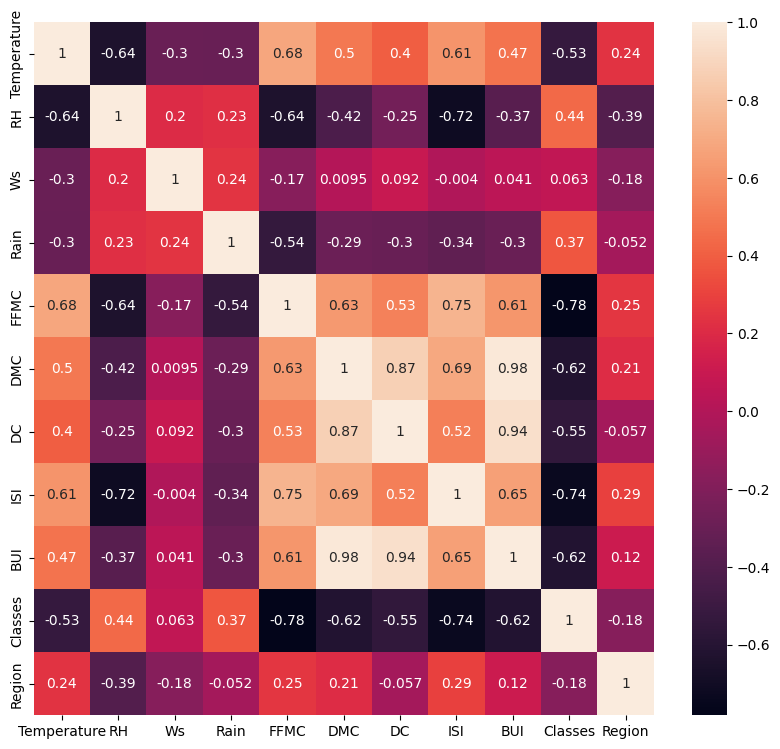

In [8]:
plt.figure(figsize=(10,9))
corr = X_train.corr()
sns.heatmap(corr, annot=True)

In [9]:
def correlation(dataset, threshold):
    corr_matrix = dataset.corr()
    high_corr_pairs = []
    to_drop = set()
    # Loop over lower triangle of the matrix
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            corr_value = abs(corr_matrix.iloc[i, j])
            if corr_value > threshold:
                col1 = corr_matrix.columns[i]
                col2 = corr_matrix.columns[j]
                high_corr_pairs.append((col1, col2))
                # Add one of the two columns to drop list
                to_drop.add(col1)

    return high_corr_pairs, to_drop

In [ ]:
# Threshold -- set by domain expert
pairs, drop_col = correlation(X_train, 0.85)
print("Highly correlated pairs...")
for p in pairs:
    print(p)
print("Suggested columns to drop...")
print(drop_col)

Highly correlated pairs...
('DC', 'DMC')
('BUI', 'DMC')
('BUI', 'DC')
Suggested columns to drop...
{'DC', 'BUI'}


In [11]:
# drop the suggest features which has high correlation 
X_train.drop(drop_col, axis=1, inplace=True)
X_test.drop(drop_col, axis=1, inplace=True)
X_train.shape, X_test.shape

((170, 9), (73, 9))

In [12]:
# Feature Scaling and standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

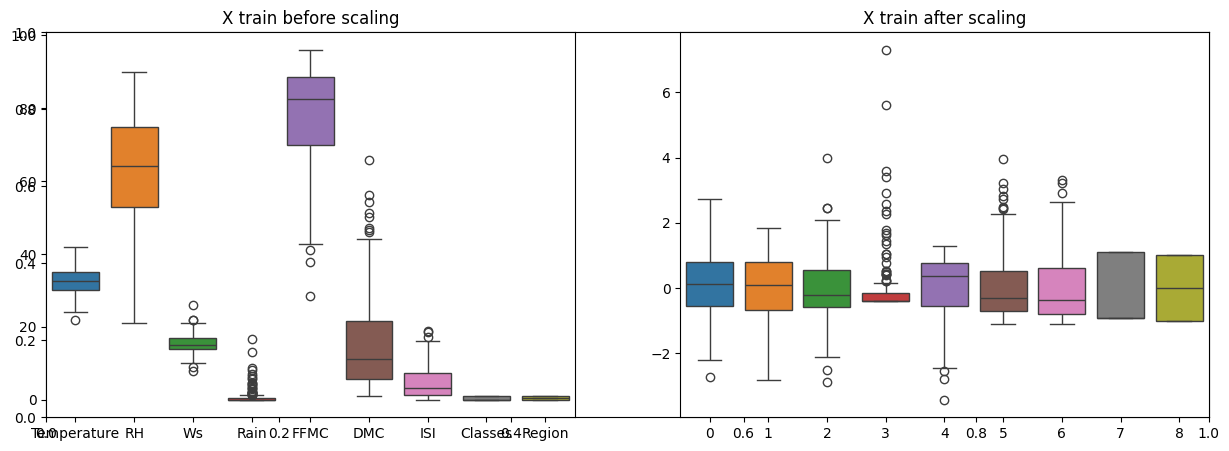

In [13]:
# Box plot to understand the effect of standardization
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('X train before scaling')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title('X train after scaling')
plt.show()

In [14]:
# Linear regressioon model
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(X_train_scaled, y_train)
y_pred = lin_model.predict(X_test_scaled)

# Performance metrices
from sklearn.metrics import mean_squared_error, r2_score
mae = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error: {mae}\nR² Score: {r2}')

Mean Absolute Error: 0.6829306792403741
R² Score: 0.9847206874554417


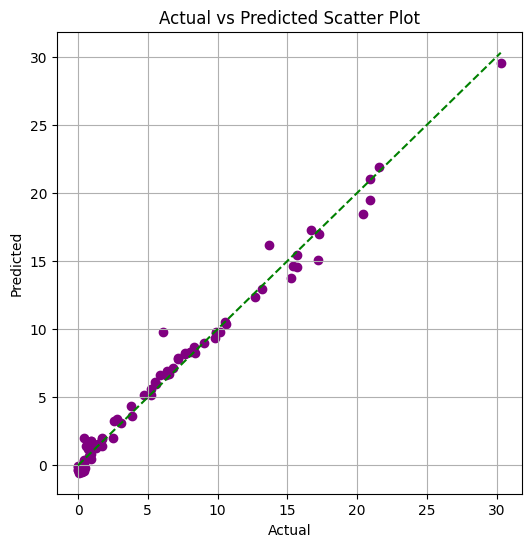

In [15]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, color='purple')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', linestyle='--')  # Line y = x
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Scatter Plot')
plt.grid(True)
plt.show()


Ridge Regression Score: 0.9841610358272455
Ridge coefficients :  [-0.05903659 -0.25366102  0.00857259 -0.03632349 -0.75473039  3.7659154
  4.67318454 -0.42802166 -0.39278913]
R2 score : 0.9847206874554417


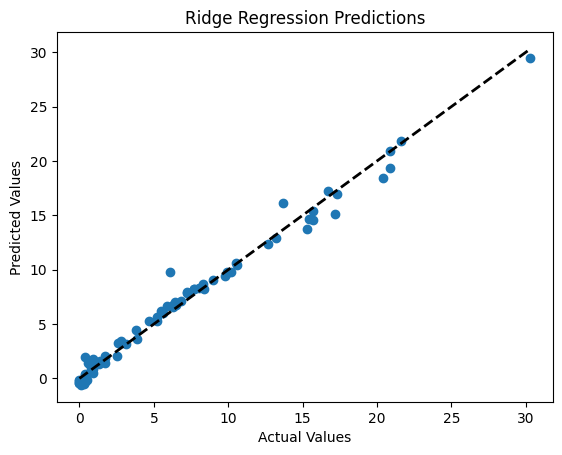

In [16]:
# Ridge lasso and Elastic net regression
from sklearn.linear_model import Ridge, Lasso, ElasticNet

ridge_mod = Ridge(alpha=1.0)
ridge_mod.fit(X_train_scaled, y_train)
ridge_predictions = ridge_mod.predict(X_test_scaled)
ridge_score = ridge_mod.score(X_test_scaled, y_test)
print("Ridge Regression Score:", ridge_score)
print("Ridge coefficients : ", ridge_mod.coef_)
print(f"R2 score : {r2_score(y_test, y_pred)}")
plt.scatter(y_test,ridge_predictions)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Ridge Regression Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()


Lasso Regression Score: 0.9786588307828462
Lasso coefficients :  [-0.         -0.          0.          0.         -0.11968493  3.62769675
  4.65040137 -0.00668545 -0.25830821]
R2 score : 0.9847206874554417


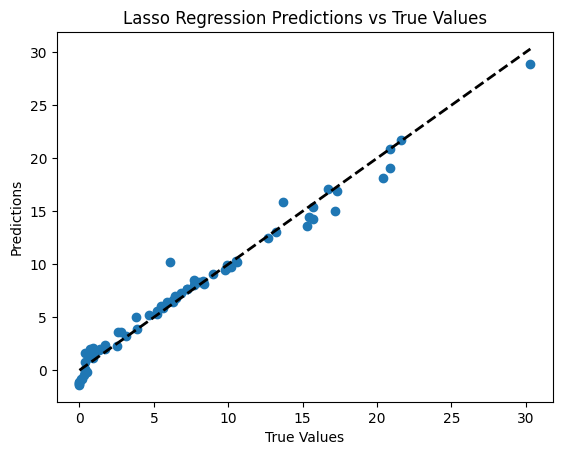

In [17]:
# Lasso Regression
lasso_mod = Lasso(alpha=0.1)
lasso_mod.fit(X_train_scaled, y_train)
lasso_predictions = lasso_mod.predict(X_test_scaled)
lasso_score = lasso_mod.score(X_test_scaled, y_test)
print("Lasso Regression Score:", lasso_score)
print("Lasso coefficients : ",lasso_mod.coef_)
print(f"R2 score : {r2_score(y_test,y_pred)}")
plt.scatter(y_test,lasso_predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Lasso Regression Predictions vs True Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)


ElasticNet Score: 0.9747060947868033
ElasticNet Coefficients: [ 0.         -0.26030811  0.08478538  0.         -0.17932211  3.54824974
  4.10130504 -0.42722662 -0.26555409]
R2 score : 0.9847206874554417


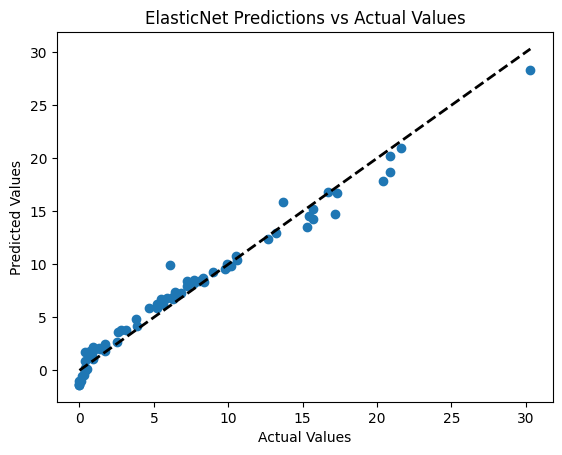

In [18]:
# Elastic Net Regression
elastic = ElasticNet(alpha=0.1, l1_ratio=0.5)  # l1_ratio = 0.5 means equal mix of Lasso and Ridge
elastic.fit(X_train_scaled, y_train)
elastic_predictions = elastic.predict(X_test_scaled)
print("ElasticNet Score:", elastic.score(X_test_scaled, y_test))
print("ElasticNet Coefficients:", elastic.coef_)
print(f"R2 score : {r2_score(y_test, y_pred)}")
plt.scatter(y_test,elastic_predictions)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("ElasticNet Predictions vs Actual Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

In [19]:
# Cross-validation using LassoCV  ----> LassoCV finds the best alpha value by using cross-validation. This automates model tuning.
from sklearn.linear_model import LassoCV
lasso_cv = LassoCV(cv=5)
lasso_cv.fit(X_train_scaled, y_train)
lasso_cv_prediction = lasso_cv.predict(X_test_scaled)


In [20]:
# best alpha value selected by the model, if not set
print(f"Best alpha value : {lasso_cv.alpha_}")

# total number of alphas over the cross-validation grid - 100
print(f"Total alphas used : {lasso_cv.alphas_}")

# coefficients of features
print(f"Coefficients of features : {lasso_cv.coef_}")

# max number of iterations for convergence ? --> finding the best model
print(f"Total no. of iterations for each fold : {lasso_cv.max_iter}")

# intercept of the model
print(f"intercept value : {lasso_cv.intercept_}")

# mse_path for all the 500 fits calculated ---> for each alfa there will be 5 fits 
# i.e, model trains on 4 folds and test on 1 fold for each fold and each fit has a fit score
print(lasso_cv.mse_path_) 

Best alpha value : 0.06177603120682054
Total alphas used : [7.1027424  6.62404134 6.17760312 5.76125335 5.37296415 5.01084435
 4.67313021 4.35817688 4.06445034 3.79051999 3.53505163 3.29680098
 3.07460763 2.86738937 2.67413692 2.49390904 2.32582792 2.1690749
 2.02288651 1.88655073 1.75940353 1.64082562 1.53023946 1.42710644
 1.33092425 1.24122441 1.15757004 1.07955369 1.00679538 0.93894074
 0.87565928 0.81664278 0.76160379 0.71027424 0.66240413 0.61776031
 0.57612533 0.53729642 0.50108444 0.46731302 0.43581769 0.40644503
 0.379052   0.35350516 0.3296801  0.30746076 0.28673894 0.26741369
 0.2493909  0.23258279 0.21690749 0.20228865 0.18865507 0.17594035
 0.16408256 0.15302395 0.14271064 0.13309242 0.12412244 0.115757
 0.10795537 0.10067954 0.09389407 0.08756593 0.08166428 0.07616038
 0.07102742 0.06624041 0.06177603 0.05761253 0.05372964 0.05010844
 0.0467313  0.04358177 0.0406445  0.0379052  0.03535052 0.03296801
 0.03074608 0.02867389 0.02674137 0.02493909 0.02325828 0.02169075
 0.020

✅ Rule of Thumb:
If the algorithm uses distances, gradients, or regularization, standardize.

In [21]:
# Pickle the machine learning models, preprocessing model standardscaler
import pickle

pickle.dump(scaler, open('scaler.pkl','wb'))
pickle.dump(ridge_mod, open('ridge.pkl','wb'))